## Assignment 1

Consider the sliding-tile puzzle pictured below. There are three black tiles, a blank space (empty location), and three yellow tiles, arranged randomly in the initial configuration given below:

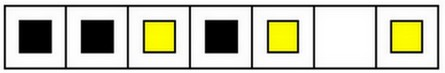

There are three legal moves:
1. (simple move) any tile can move into an adjacent empty location,
2. (jump move) any tile can jump over exactly one tile and land in the empty location, and
3. (jump move) any tile can jump over exactly two tiles and land in the empty location.

The goal is to move all the yellow tiles to the left of all the black tiles as follows:

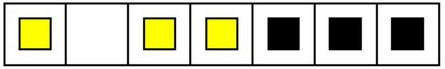

Note that the final configuration is not unique as the blank space can be in 7 different locations and in each case the yellow and black tiles satisfy the goal conditions.

The objective is to solve the sliding-tile puzzle using various search strategies. That is, find a sequence of legal moves that takes a given "initial" configuration (start) to the specified "final" one (goal) state.

You will have to complete the code cells below. More explanations and comments need to be provided there.  

Note that in case a solution does **not** exist for some *start* and *goal* state pairs, your program will report it.

The first search strategy to be considered is Iterative Deepening Search (IDS).

Here are the required components for solving the sliding-tile puzzle using IDS:
1. State Representation: There will be a list of 6 tiles plus a blank space, with 2 colors for the tiles.
2. Goal Check: This function checks if the current state is the final state.
3. Legal Moves: The legal moves will need to be defined along with their costs.
4. Depth-Limited Search: This is a helper function to perform depth-limited search at each depth level.
5. Iterative Deepening Search (ID): Main function to perform the search which will keep calling the depth-limited search function until a solution has been found.

For IDS, we assume that the cost of any move is 1, including the jump moves over one or two tiles. In this way, IDS will find **the shortest path where the path length represents the total number of moves** to get to the final state.    

In [48]:
# the code for the goal state check function and the generation of all possible successors states
# from the current state determined by the valid moves; there is also a helper function.

# Define the goal state check function
def check_goal(state):
    # The goal is to have all 'Y' tiles on the left of all 'B' tiles
    return state.find('B') >= state.rfind('Y')

# Generate all possible successors from the current state
def generate_successors(state):
    successors = []
    blank_index = state.index('_')

    # Move to adjacent positions
    if blank_index > 0:
        successors.append(swap(state, blank_index, blank_index - 1))
    if blank_index < 6:
        successors.append(swap(state, blank_index, blank_index + 1))

    # Jump over one tile
    if blank_index > 1:
        successors.append(swap(state, blank_index, blank_index - 2))
    if blank_index < 5:
        successors.append(swap(state, blank_index, blank_index + 2))

    # Jump over two tiles
    if blank_index > 2:
        successors.append(swap(state, blank_index, blank_index - 3))
    if blank_index < 4:
        successors.append(swap(state, blank_index, blank_index + 3))

    return successors

# Helper function to swap elements in the state
def swap(state, i, j):
    new_state = list(state)
    new_state[i], new_state[j] = new_state[j], new_state[i]
    return ''.join(new_state)

The following function implements depth-limited search using recursion. It will construct a path to the goal node while traversing the search tree up to the specified depth limit.

In particular, it takes in a state, a path and a depth level, and if the goal state has been found, it returns the path from the start state to the goal state.

In [51]:
#Perform Depth-Limited Search (DLS)
def dls(state, depth_limit, path):
    if check_goal(state):
        return path
    if depth_limit == 0:
        return None

    for successor in generate_successors(state):
        if successor not in path:  # Avoid cycles
            result = dls(successor, depth_limit - 1, path + [successor])
            if result:
                return result

    return None

The following function implements Iterative Deepening Search (IDS) using depth-limited search.

In particular, the ids function iteratively increases the depth limit and calls depth-limited seach function dls until the goal state has been reached. In particular, it takes in an initial state, and if the goal state has been found at some depth level by depth-limited search, it returns the found path from the start state to the goal state.


In [54]:
# Perform Iterative Deepening Search (IDS)
def ids(initial_state):
    depth = 0
    while True:
        result = dls(initial_state, depth, [initial_state])
        if result:
            return result
        depth += 1


Here is an example usage of the ids function:

In [57]:
## Initial state example: 3 tiles per colour, 2 colours
initial_state = 'BYBY_YB'

print("Initial state:", initial_state)

# Solve the puzzle
solution_path = ids(initial_state)

# Print the solution path
if solution_path:
    print("Solution found!")
    for step in solution_path:
        print(step)
else:
    print("No solution found.")

Initial state: BYBY_YB
Solution found!
BYBY_YB
BY_YBYB
BYY_BYB
_YYBBYB
YY_BBYB
YYYBB_B


### Task 1

Your first task is to modify the program given above for solving a more general version of the sliding-tile puzzle: there will be <b>n > 0 tiles for each colour</b> plus a space, with any two colors for the tiles. In the example state given below, there are 4 black tiles, and 4 yellow tiles, and a blank space (empty location), arranged randomly in the initial configuration given below:

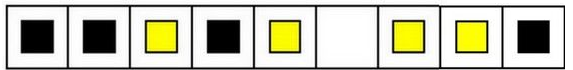

The goal is to move all the yellow tiles to the left of all the black tiles as follows:

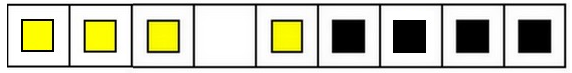

Note that the final configuration is not unique as the blank space can be in 9 different locations and in each case the yellow and black tiles satisfy the goal conditions.

You will need to revise the state representation, the goal check, and the moves accordingly.
1. State Representation will have a list of <b>n > 0 tiles for each colour</b> plus a blank space, with any two given colors for the tiles.
2. Tile Colur Ordering: This is given in a list of the first and the second colours.
3. Goal Check: All the tiles of the first color will be to the left of all the tiles of the second color. As before, the blank space can be located anywhere.
4. Legal Moves: These are the same as before, a tile can be moved to an adjacent blank location, it can jump over one tile, or jump over two tiles.

Your revised Iterative Deepening Search program will print the sequence of states starting form the initial state to a goal state, along with the total number of nodes visited (explored),  the total number of nodes generated and the total runtime.

You need to provide the code where you see <b>pass</b> and add any other helper function / code you will need for your program.

In [60]:
# modified code for the goal state check function and the generation of all possible successors states
# from the current state determined by the valid moves; add any helper functions you may need for this part

import random
from collections import deque
import time

def is_goal(state, n, colors):
    # The goal is to have all tiles of the first color on the left, 
    # followed by all tiles of the second color, regardles of where blank space is
    pass
    
# Generate all possible successors from the current state
def generate_successors(state):
    successors = []
    pass
    return successors

# Helper function to swap elements in the state
def swap(state, i, j):
    pass


In [62]:
# Implementations of Depth-Limited Search (DLS) and Iterative Deepening Search (IDS) with metrics

# Perform Depth-Limited Search (DLS) with metrics
def dls(state, depth_limit, path, n, colors, stats):
    pass

# Perform Iterative Deepening Search (IDS) with metrics
def ids(initial_state, n, colors):
    pass


Test your program with several initial configurations (either generated randomly, or directly assigned):

In [65]:
# Test cases - at least three

# This function populates the tile list with n tiles of each color randomly
def create_random_initial_state(n, colors):
    pass
    
# This function prints the solution path and metrics
def print_solution(solution_path, stats):
    if solution_path:
        pass
    else:
        pass

In [67]:
# Example with n = 4 and two colors
n = 4
colors = ['Y', 'B']  # Representing two random colours

# Create a random initial state with n tiles of each color
pass

# Solve the puzzle and get metrics
pass

# Print the solution path and metrics
pass

**The sample output with n = 4 and two colors:**

### Task 2

In the following you will implement **A\* algorithm** to find a solution to the sliding-tile puzzle as defined in **Task 1**. The A* algorithm uses a priority queue (the frontier) to explore states in the order of their estimated total cost (f_value), which is the sum of the actual cost to reach the state (g_value) and the heuristic estimate (h_value). You may choose **any admissible heuristic function** you think would be suitable for the sliding-tile puzzle problem.

For Informed Search methods such as A* algorithm and Beam Search descibed below, we assume that the cost of a simple move is 1, and the cost of a jump move is the number of tiles jumped over plus 1. In this way, the A* algorithm will find **the optimal path which minimizes the total cost along any given path**.

For the implementation of the priority queue, you should try using the functions from the module **heapq** (see <a href="https://docs.python.org/3/library/heapq.html"> "See Python Documentation for **heapq**" </a>).

Further details are given below:

1. The *heap* data structure is usually used to implement priority queues (PQ). Recall that in a PQ each item has a priority. The item with smallest value gets the highest priority.
2. An item in the queue is a tuple. The first is the estimated distance to the goal given by the chosen heuristic. This determines the priority. The second member of the tuple is the state.
3. You will need the function *heappop* to extract the item with highest priority (lowest distance).
4. Use the function *heappush* to put an item into the queue.

Your A* Search program will print the sequence of states starting form the initial state to a goal state, along with the total number of nodes visited (explored), the total number of nodes generated and the total runtime.

You need to provide the code where you see <b>pass</b> and add any other helper function / code you will need for your program.

The sample output with n = 4 and two colors:

In [19]:
# the code for the goal state check function and the generation of all possible successors states
# from the current state determined by the valid moves; add any helper functions you may need for this part

import random
import heapq
import time

# Define the goal state check function
def is_goal(state, n, colors):
    # The goal is to have all tiles of the first color on the left, 
    # followed by all tiles of the second color, regardles of where blank space is
    pass
    
# Generate all possible successors from the current state
def generate_successors(state):
    pass

# Helper function to swap elements in the state
def swap(state, i, j):
    pass


In [20]:
# Implementations of the Heuristic function and the A* Search algorithm with metrics

# Heuristic function: Manhattan distance
def heuristic(state, n, colors):
    pass

def a_star_search(initial_state, n, colors):
    pass

# Reconstruct the path from the goal state back to the initial state -- if required
def reconstruct_path(came_from, current):
    pass


Test your program with several initial configurations (either generated randomly, or directly assigned):

In [22]:
# Test cases - at least three

# Create a random initial state with n tiles of each color
def create_random_initial_state(n, colors):
    pass

# This function prints the solution path and metrics
def print_solution(solution_path, stats):
    if solution_path:
        pass
    else:
        pass


In [23]:
# Example with n = 3 and two colors

# Create a random initial state with n tiles of each color
pass

# Solve the puzzle and get metrics
pass

# Print the solution path and metrics
pass


**The sample output with n = 4 and two colors:**

### Task 3

Beam Search is a heuristic search algorithm that explores a graph by expanding the most promising nodes in a limited way. It's a variation of Best-First Search that uses a heuristic function, but unlike A*, it doesn't guarantee optimality or completeness. Instead of keeping all the promising nodes in a priority queue (the frontier), it only keeps a fixed number, or "beam," of the best nodes at each level of the search tree. This makes it much more memory-efficient than A* at the cost of potential sub-optimality.

In the following diagram, the beam width is 2 which means at any level, only two most promising nodes determined by the lowest heuristic f-scores will be inserted to the frontier. Black nodes represent the explored nodes, grey nodes are currently in the frontier, and white nodes in the rectangles have been generated and considered for insertion into the frontier (for which f-scores have been calculated); the rest of the white nodes will never be generated or considered.  

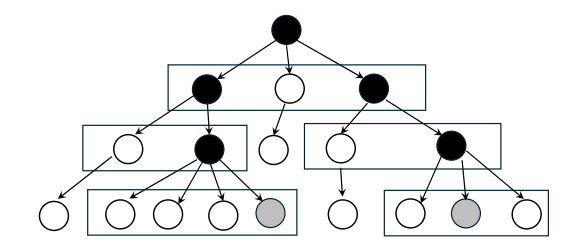

To implement Beam Search, we will need to adapt the core logic of a breadth-first search (BFS). The main difference is that instead of exploring all nodes at a given depth like in BFS, you only keep the k most promising ones, where k is the given beam width. If k is equal to the branching factor of the search tree, we will be doing BFS.

For Informed Search methods such as the Beam Search descibed above, we assume that the cost of a simple move is 1, however, the cost of a jump move is the number of times jumped over plus 1. Note that the Beam Search method is an anytime algorithm and it does not guarantee optimality nor completeness.

Your Beam Search program will print the sequence of states starting form the initial state to a goal state, along with the total number of nodes visited (explored), the total number of nodes generated and the total runtime.

You need to provide the code where you see <b>pass</b> and add any other helper function / code you will need for your program.

In [25]:
# Implementations of the Beam Search algorithm with metrics

def beam_search(initial_state, beam_width, n, colors):
    pass

In [26]:
# Example with n = 4 and two colors

# Create a random initial state with n tiles of each color
pass

# Solve the puzzle using Beam Search and get metrics
pass

# Print the solution path and metrics
pass

**The sample output with n = 4 and two colors:**

### Discussion

**The discussion should be anywhere between half a page to one page of writing.**


#### Marking Guidelines

Here are the details of how marks will be assigned to the tasks in Assignment 1.

**10** marks are reserved for code clarity and style, and appropriate comments which explain what assumptions / decisions / changes have been made for various parts of your code. Add your comments in markdown cells and clearly identify them as **Comments**.

**25** marks are reserved for Task 1: Goal check & successor states for the more general sliding puzzle (5 marks), Depth-Limited Search (5 marks), Iterative-Deepening Search (10 marks), Testing - at least three cases (5 marks)

**30** marks are reserved for Task 2: Heuristic function (5 marks); A* algorithm with metrics (20 marks), Testing - at least three cases (5 marks)

**25** marks are reserved for Task 3: Beam Search algorithm with metrics (20 marks), Testing - at least three cases (5 marks)

**10** marks are reserved for discussion of lessons learnt, what worked and why. Add your comments in markdown cells. 

**Note that tests should cover different puzzle sizes/difficulties (e.g., easy, medium, hard) to ensure robustness, not just trivial cases.**

#### Special Consideration and Late Submissions

Unless a Special Consideration request has been submitted and approved, a **5% penalty** (of the total possible mark) will be applied each day a written assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of '0' will be awarded even if the assessment is submitted. Submission time for all written assessments is set at 11:55 pm. A 1-hour grace period is provided to students who experience a technical concern.

For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, students need to submit an application for Special Consideration.

**Assignment 1: YES, Standard Late Penalty applies**

Assignment 2: YES, Standard Late Penalty applies